### How to Tell a Story Using Data Project:
# Market research on robot-run restaurants in LA

## Project description
You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?<br>
You’re an analytics guru, so your partners have asked you to prepare some market research. You have open-source data on restaurants in LA.

## Table of Contents

* [Download and preprocess the data](#Step-1)
* Data Analysis:
    1. [Proportions of various types of establishments](#Investigate-the-proportions-of-the-various-types-of-establishments.-Plot-a-graph.)
    2. [Proportions of chain and none-chain establishments](#Investigate-the-proportions-of-chain-and-nonchain-establishments.-Plot-a-graph.)
    3. [Chain to none-chain splitted by establishment type](#Which-type-of-establishment-is-typically-a-chain?)
    4. [Chain characteristics](#What-characterizes-chains:-many-establishments-with-a-small-number-of-seats-or-a-few-establishments-with-a-lot-of-seats?)
    5. [Average number of seats for each establishment type](#Determine-the-average-number-of-seats-for-each-type-of-restaurant.-On-average,-which-type-of-restaurant-has-the-greatest-number-of-seats?-Plot-graphs.)
    6. [Streets analysis](#Put-the-data-on-street-names-from-the-address-column-in-a-separate-column.)
    7. [Summary](#Market-research-on-robot-run-restaurants-in-LA:-summary)

In [1]:
## LIBRARIES CELL

import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median
import re

# Step 1
## Download and preprocess the data

In [2]:
# load samples to check column types

try: # local file
    data_demo = pd.read_csv('datasets/rest_data_us.csv', nrows = 500)
except: # hub file
    data_demo = pd.read_csv('/datasets/rest_data_us.csv', nrows = 500)

# check samples's sizes and data types
data_demo.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           500 non-null    int64 
 1   object_name  500 non-null    object
 2   address      500 non-null    object
 3   chain        500 non-null    bool  
 4   object_type  500 non-null    object
 5   number       500 non-null    int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 113.8 KB


In [3]:
data_demo.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [4]:
data_demo.object_type.unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

In [5]:
# load full data:

try: # local file
    data_raw = pd.read_csv('datasets/rest_data_us.csv', dtype = {'object_type':'category'})
except: # hub file
    data_raw = pd.read_csv('/datasets/rest_data_us.csv', dtype = {'object_type':'category'})

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   object  
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int64   
dtypes: category(1), int64(2), object(3)
memory usage: 386.8+ KB


In [7]:
data_raw.describe(include = ['object', 'category'])

,object_name,address,chain,object_type
count,9651,9651,9648,9651
unique,8672,8517,2,6
top,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,False,Restaurant
freq,47,11,5972,7255


In [8]:
data_raw.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


In [9]:
# rename "number" column, so it will be obvious what is it about:
data_raw = data_raw.rename(columns = {'number':'seats'})

In [10]:
# make str columns more readable
data_raw['object_name'] = data_raw['object_name'].apply(string.capwords)
data_raw['address'] = data_raw['address'].apply(string.capwords)

data_raw.head()

,id,object_name,address,chain,object_type,seats
0,11786,Habitat Coffee Shop,3708 N Eagle Rock Blvd,False,Cafe,26
1,11787,Reilly's,100 World Way # 120,False,Restaurant,9
2,11788,Street Churros,6801 Hollywood Blvd # 253,False,Fast Food,20
3,11789,Triniti Echo Park,1814 W Sunset Blvd,False,Restaurant,22
4,11790,Pollen,2100 Echo Park Ave,False,Restaurant,20


In [11]:
# Check share of missing rows before removing:

print('The share of missing rows is: {:.2%}'.format(data_raw['chain'].isna().sum() / len(data_raw)))

The share of missing rows is: 0.03%


In [12]:
# drop rows with missing values
data_raw = data_raw.dropna()

In [13]:
# check duplicates:
data_raw.duplicated().sum()

0

In [14]:
# check what share each category takes
data_raw.object_type.value_counts(normalize = True)

Restaurant    0.751762
Fast Food     0.110489
Cafe          0.045087
Pizza         0.033064
Bar           0.030265
Bakery        0.029333
Name: object_type, dtype: float64

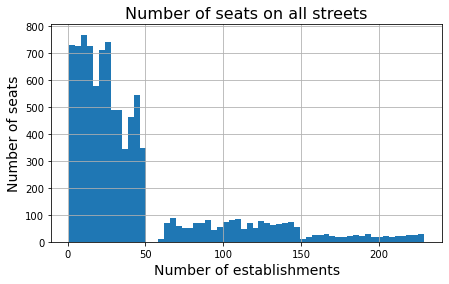

In [15]:
# check seats histogram

data_raw.seats.hist(bins = 60, figsize = (7,4))
plt.ylabel('Number of seats', fontsize = 14)
plt.xlabel('Number of establishments', fontsize = 14)
plt.title('Number of seats on all streets', fontsize = 16)
plt.show()

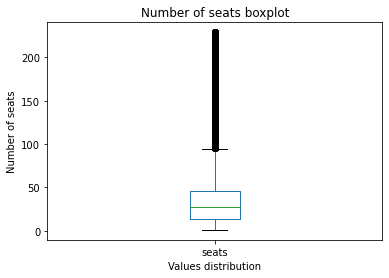

In [16]:
data_raw.seats.plot(kind = 'box')
plt.ylabel('Number of seats')
plt.xlabel('Values distribution')
plt.title('Number of seats boxplot')
plt.show()

In [17]:
#check share of establishments with over 100 and over 150 seats:
print('The share of establishments with more than 100 seats is {:.2%}'
      .format(len(data_raw.query('seats > 100')) / len(data_raw)))
print()
print('The share of establishments with more than 150 seats is {:.2%}'
      .format(len(data_raw.query('seats > 150')) / len(data_raw)))
print()

The share of establishments with more than 100 seats is 13.74%

The share of establishments with more than 150 seats is 4.84%



#### <font color = 'blue'>Notes:</font>

While preprocessing, the following changes were made to the original data:<br>
* 'object_type' column was converted to the category type.
* 'number' column was renamed to 'seats' - it's numeric, so it is obvious that this column contains some number, but now it is also obvious, what numbers exactly are stored there.
* Uppercase columns were converted to more readable format, with capitalized words.
* Three rows with missing data (0.03%) were removed.


No duplicates in data were found.<br>
No outliers were found also.<br>
I decided against treating higher values in 'seats' column as outliers. On the one hand, I am making research for a small spot so larger spots don't seem relevant, and according to the boxplot they can be treated as outliers. On the other hand, distribution of values clearly divides all the establishments into three categories, with obvious limits to each: up to 50 seats, 51-150 seats and 151-229 seats. Since all the values are distributed by some inner logic, dropping them may lead to losing valuable data.

 [Return to table of contents ^^^](#Table-of-Contents)


# Step 2
## Investigate the proportions of the various types of establishments. Plot a graph.

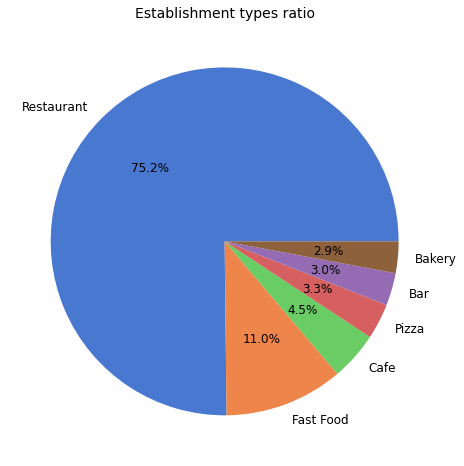

In [18]:
colors = sns.color_palette('muted')
data_raw.object_type.value_counts().plot(
    kind = 'pie', fontsize = 12,  autopct='%1.1f%%', legend = False, figsize = (8,8), colors = colors)
plt.title('Establishment types ratio', fontsize = 14)
plt.ylabel('')
plt.show()

#### <font color = 'blue'>Notes:</font>

Most of the establishments are restaurants, with fast food in the second place.

 [Return to table of contents ^^^](#Table-of-Contents)

## Investigate the proportions of chain and nonchain establishments. Plot a graph.

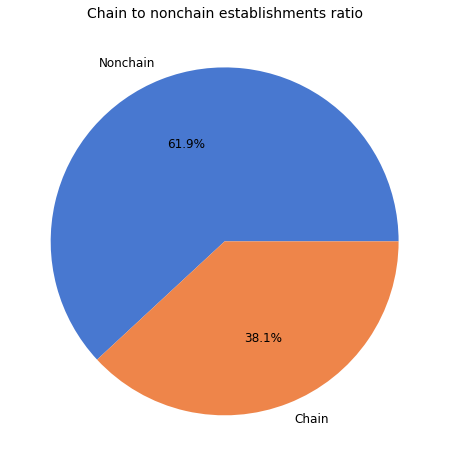

In [19]:
data_raw.groupby('chain').id.count().plot(
    kind = 'pie', fontsize = 12,  autopct='%1.1f%%', figsize = (8,8), colors = colors, labels = ['Nonchain', 'Chain'])
plt.title('Chain to nonchain establishments ratio', fontsize = 14)
plt.ylabel('')
plt.show()

#### <font color = 'blue'>Notes:</font>

Most of the establishments are non-chains.

 [Return to table of contents ^^^](#Table-of-Contents)

## Which type of establishment is typically a chain?

In [20]:
for category in data_raw.object_type.unique():
    if category == 'Cafe':
        temp1 = pd.concat([data_raw.query('object_type == @category')['chain'].value_counts(normalize = True)], axis = 1)
        temp1 = temp1.rename(columns = {'chain':category})
    else:
        temp1 = pd.concat([temp1, 
                           data_raw.query('object_type == @category')['chain'].value_counts(normalize = True)], axis = 1)
        temp1 = temp1.rename(columns = {'chain':category})

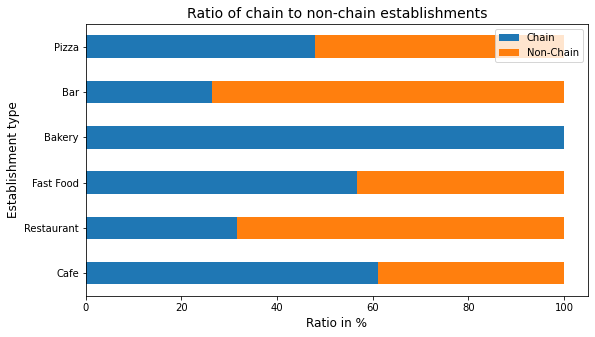

In [21]:
(temp1.T*100).plot(kind = 'barh', stacked = True, figsize = (9,5))
plt.legend(['Chain', 'Non-Chain'])
plt.xlabel('Ratio in %', fontsize = 12)
plt.ylabel('Establishment type', fontsize = 12)
plt.title('Ratio of chain to non-chain establishments', fontsize = 14)
plt.show()

#### <font color = 'blue'>Notes:</font>

* All of the bakeries belong to chains.
* Bars and restaurants are mostly non-chains.

 [Return to table of contents ^^^](#Table-of-Contents)

## What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?


In [22]:
# check for W streets which according to map should be more than one:
data_raw[data_raw['address'].str.contains('W ') & data_raw['address'].str.contains('St')].head(10)

,id,object_name,address,chain,object_type,seats
7,11793,Pho Lala,3500 W 6th St Ste 226,False,Restaurant,7
12,11798,Emc Restaurant Group Llc,3500 W 6th St Ste 101,True,Restaurant,133
20,11806,Crystal Cafe,3500 W 6th St Ste #321,False,Restaurant,16
21,11807,Orange Tree Cafe,3500 W 6th St Ste #220,False,Restaurant,14
28,11814,Beverly Falafel,8508 W 3rd St,False,Restaurant,31
35,11821,Reggie's Deli & Cafe,1910 W Sunset Blvd Ste 150,True,Restaurant,1
50,11836,Jacky's Restaurant,310 W 5th St #102,True,Restaurant,27
53,11839,Prime Grind Coffee,714 W 1st St,False,Cafe,4
74,11860,Noodle Plus,3250 W Olympic Blvd Ste 309,False,Restaurant,25
75,11861,Vns Chicken,3250 W Olympic Blvd Ste 105,False,Restaurant,29


In [23]:
# create function for removing numbers from text (it will be useful later in extracting street names too)

def clear_numbers(value):
    result = []
    # I checked LA map and there were many numbered 'W' streets, so I separate processing those name with a condition:
    if 'W ' in value and 'th St' in value:
        # every such street value looks like "W XXth St", where XX is some number, so I need to extract those three words:
        street_id = re.search('W (.+?) St', value).span()
        return value[street_id[0]:street_id[1]]
    else:       
        for word in value.split(' '):
            if word.isalpha():
                result.append(word)
        if result == []:
            return value
        else:
            return ' '.join(result)

In [24]:
# add a column of object names without numbers:
data_raw['object_name'] = data_raw['object_name'].apply(clear_numbers)

In [25]:
data_chains = data_raw.query('chain == True')

chains = data_chains.groupby('object_name').agg(
    {'object_name':'count', 'seats':'mean'}).rename(columns = {'object_name':'establishments'}).reset_index()

# check the result:
chains.sort_values('establishments', ascending = False)

,object_name,establishments,seats
1669,Subway,121,16.826446
1652,Starbucks Coffee,87,24.850575
1473,Restaurant,59,43.610169
758,Jack In The Box,53,65.981132
1780,The Coffee Bean Tea Leaf,52,26.057692
...,...,...,...
766,Jang Ga Ne Restaurant,1,8.000000
765,Jang An Restaurant,1,1.000000
764,Janet Lee,1,23.000000
763,James Restaurant,1,4.000000


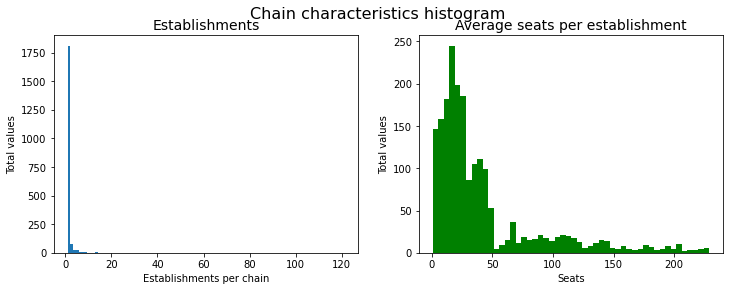

In [26]:
# check establishments and seats histograms:

fig, axis = plt.subplots(1,2, figsize = (12,4))
fig.suptitle('Chain characteristics histogram', fontsize = 16)

# establishments
axis[0].hist(chains.establishments, bins = 100)
axis[0].set_title('Establishments', fontsize = 14)
axis[0].set_xlabel('Establishments per chain')
axis[0].set_ylabel('Total values')

# seats
axis[1].hist(chains.seats, bins = 50, color = 'green')
axis[1].set_title('Average seats per establishment', fontsize = 14)
axis[1].set_xlabel('Seats')
axis[1].set_ylabel('Total values')

plt.show()

In [27]:
print('Share of chains with only 1 establishmen in LA:', 
     round(len(chains.query('establishments == 1')) / len(chains), 2))
print('The average amount of seats in chains with only 1 establishment:',
     round(chains.query('establishments == 1').seats.mean()))

Share of chains with only 1 establishmen in LA: 0.75
The average amount of seats in chains with only 1 establishment: 44


In [28]:
print('The average amount of seats in chain establishments:',
     round(chains.seats.mean()))

print('The average amount of establishments in chains with more than 1 establishment in LA:',
     round(chains.query('establishments > 1').establishments.mean()))

The average amount of seats in chain establishments: 42
The average amount of establishments in chains with more than 1 establishment in LA: 4


#### <font color = 'blue'>Notes:</font>

* Most of the chains (75%) have only 1 establishment in LA. I decided against removing them from the dataset, because there are probably many global chains which work in more than one region.
* For chains that have more than 1 establishment in LA, average number of establishments is 4.
* Average amount of seats per chain with 1 establishment is 44, for chains with more than 1 establishment is 42.

 [Return to table of contents ^^^](#Table-of-Contents)

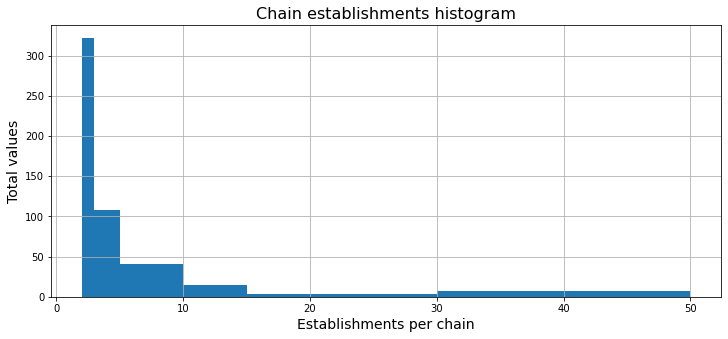

In [29]:
# check establishments per chain for chains with 2-50 establishments in LA:

chains.query('establishments > 1').establishments.hist(bins = [2, 3, 5, 10, 15, 20, 30, 50], figsize = (12,5))
plt.ylabel('Total values', fontsize = 14)
plt.xlabel('Establishments per chain', fontsize = 14)
plt.title('Chain establishments histogram', fontsize = 16)
plt.show()

In [30]:
# function for dividing values into 3 categories, with option to enter manually category limits

def categorize (column, low, medium):
    if column <= low:
        return 'small'
    elif column <= medium:
        return 'medium'
    else: 
        return 'large'

In [31]:
# categorize chains by number of establishments and seats:

chains['chain_size'] = chains['establishments'].apply(categorize, low = 5, medium = 15)
chains['establishment_size'] = chains['seats'].apply(categorize, low = 50, medium = 150)
chains.head()

,object_name,establishments,seats,chain_size,establishment_size
0,333,1,180.0,small,large
1,A Mi Japanese Restaurant,1,204.0,small,large
2,A Won Japanase Restaurant,1,105.0,small,medium
3,A Won Japanese Restaurant,1,97.0,small,medium
4,Aa Chinese Express Fast Food,1,15.0,small,small


In [32]:
chain_cat = chains.pivot_table(
    columns = 'chain_size',
    index = 'establishment_size',
    values = 'object_name',
    aggfunc = 'count').fillna(0)

chain_cat

chain_size,large,medium,small
establishment_size,,,
large,0.0,1.0,89.0
medium,4.0,2.0,326.0
small,14.0,31.0,1526.0


In [33]:
chain_cat_norm = pd.crosstab(
    columns = chains.chain_size,
    index = chains.establishment_size,
    values = chains.object_name,
    aggfunc = 'count',
    normalize = 'columns').round(2)

chain_cat_norm

chain_size,large,medium,small
establishment_size,,,
large,0.00,0.03,0.05
medium,0.22,0.06,0.17
small,0.78,0.91,0.79


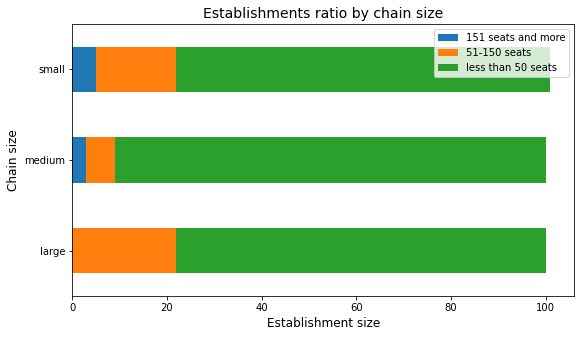

In [34]:
(chain_cat_norm.T*100).plot(kind = 'barh', stacked = True, figsize = (9,5))
plt.legend(['151 seats and more', '51-150 seats', 'less than 50 seats'])
plt.xlabel('Establishment size', fontsize = 12)
plt.ylabel('Chain size', fontsize = 12)
plt.title('Establishments ratio by chain size', fontsize = 14)
plt.show()

#### <font color = 'blue'>Notes:</font>

To answer to this question, I categorized each chain by average amount of seats and number of establishments, and then counted how many chains there are in each kind of category. The results are:
* All kinds of chains have mostly small establishments (up to 50 seats).
* Large chains have greatest share of medium sized establishments (51-150 seats).
* There are very little large establishments: only 5% and 4% of small and medium chains, relatively.

 [Return to table of contents ^^^](#Table-of-Contents)

## Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

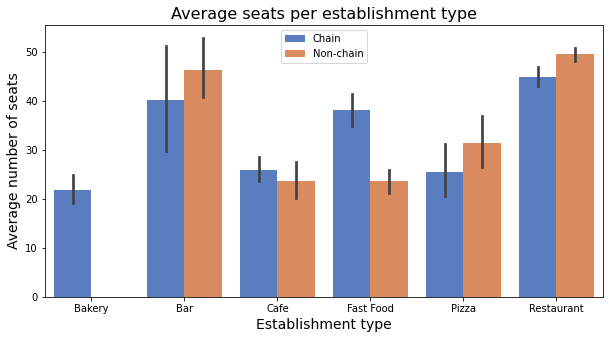

In [35]:
plt.figure(figsize = (10,5))
ax = sns.barplot(data = data_raw, 
                 y = 'seats', 
                 x = 'object_type', 
                 hue = 'chain', 
                 palette = 'muted', 
                 hue_order = [True, False])

h, l = ax.get_legend_handles_labels()
ax.legend(h, ['Chain', 'Non-chain'])

ax.set_title('Average seats per establishment type', fontsize = 16)
ax.set_xlabel('Establishment type', fontsize = 14)
ax.set_ylabel('Average number of seats', fontsize = 14)
plt.show()

#### <font color = 'blue'>Notes:</font>

* Restaurants and bars have largest average number of seats (45-50).
* Non-chain restaurants and bars are larger.
* Bakeries have the smallest average number of seats (around 21), and all of them are chains.

 [Return to table of contents ^^^](#Table-of-Contents)

## Put the data on street names from the address column in a separate column.

In [36]:
data_raw['street'] = data_raw['address'].apply(clear_numbers)
data_raw.head()

,id,object_name,address,chain,object_type,seats,street
0,11786,Habitat Coffee Shop,3708 N Eagle Rock Blvd,False,Cafe,26,N Eagle Rock Blvd
1,11787,Reilly's,100 World Way # 120,False,Restaurant,9,World Way
2,11788,Street Churros,6801 Hollywood Blvd # 253,False,Fast Food,20,Hollywood Blvd
3,11789,Triniti Echo Park,1814 W Sunset Blvd,False,Restaurant,22,W Sunset Blvd
4,11790,Pollen,2100 Echo Park Ave,False,Restaurant,20,Echo Park Ave


## Plot a graph of the top ten streets by number of restaurants.

In [37]:
toptenstreets = data_raw.groupby('street').agg({'object_name':'count'}
                                              ).sort_values('object_name', ascending = False).head(10)

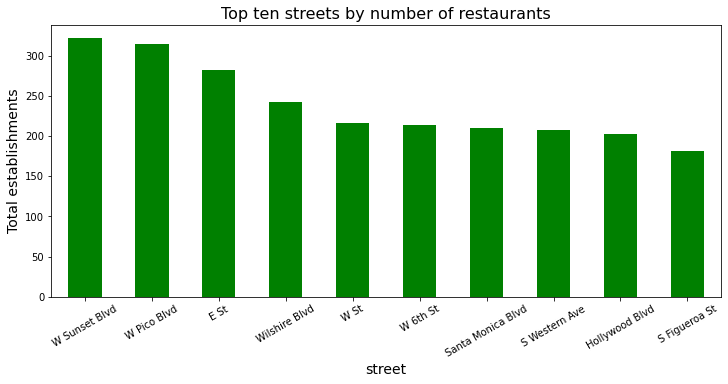

In [38]:
toptenstreets.plot(kind = 'bar', figsize = (12,5), color = 'green', rot = 30).legend().remove()
plt.title('Top ten streets by number of restaurants', fontsize=16)
plt.ylabel('Total establishments', fontsize=14)
plt.xlabel('street', fontsize=14)
plt.show()

## Find the number of streets that only have one restaurant.

In [39]:
print('The number of streets with only one restaurant is:',
      len(data_raw.groupby('street').agg({'object_name':'count'}).query('object_name == 1')))

The number of streets with only one restaurant is: 651


## For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

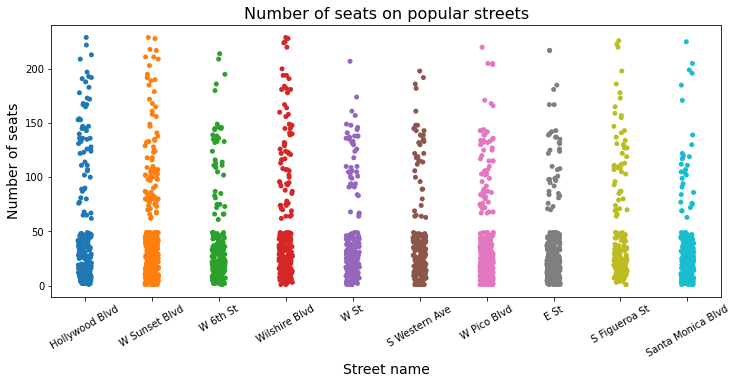

In [40]:
plt.figure(figsize = (12,5))
sns.stripplot(data = data_raw.query('street in @toptenstreets.index'), x = 'street', y = 'seats')
plt.xticks(rotation=30)
plt.ylabel('Number of seats', fontsize = 14)
plt.xlabel('Street name', fontsize = 14)
plt.title('Number of seats on popular streets', fontsize = 16)
plt.show()

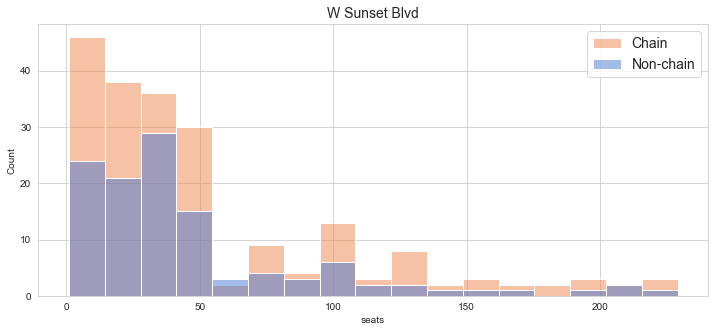

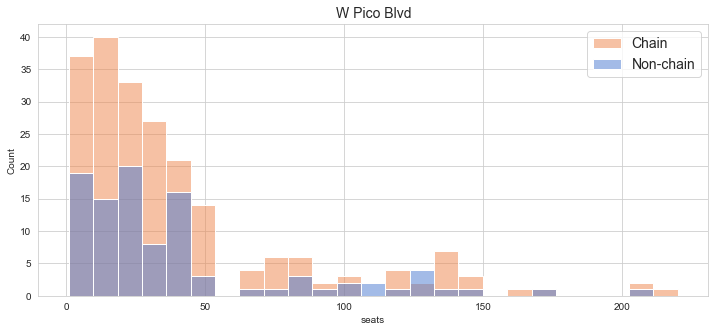

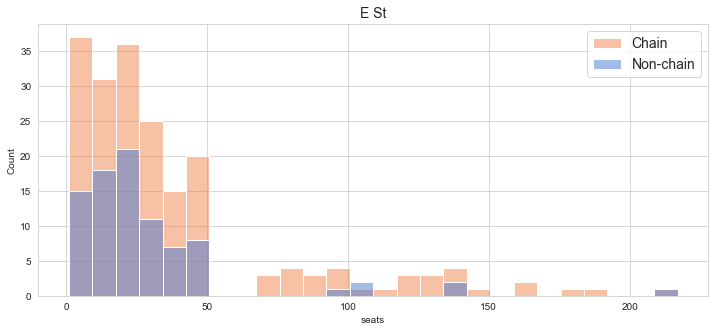

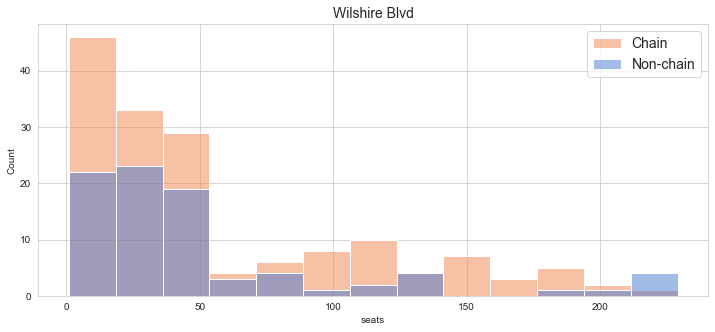

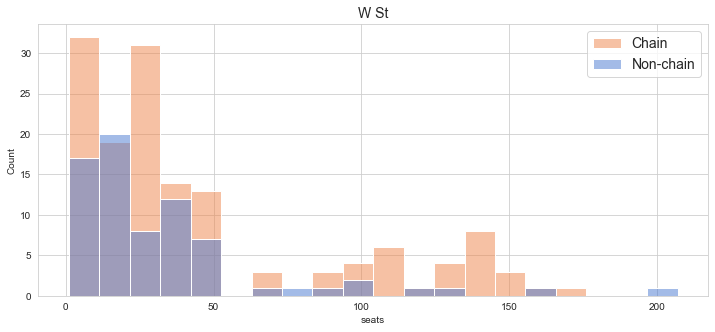

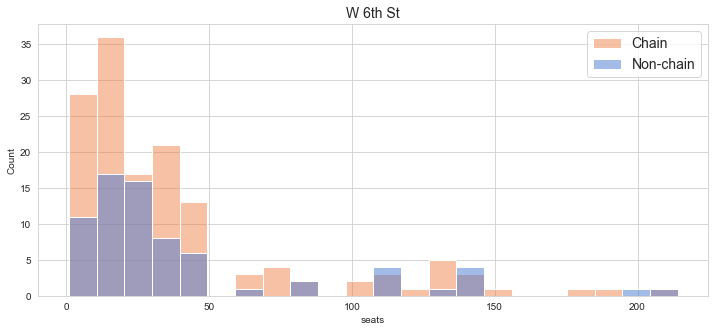

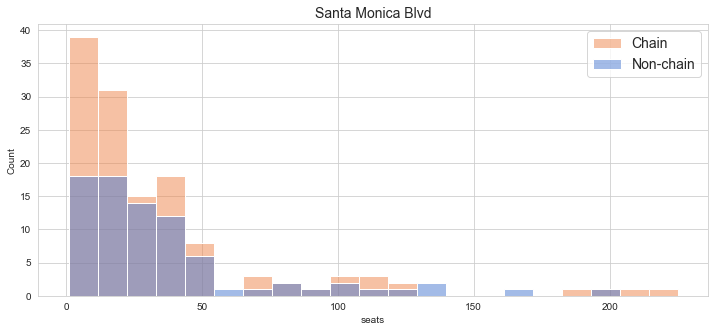

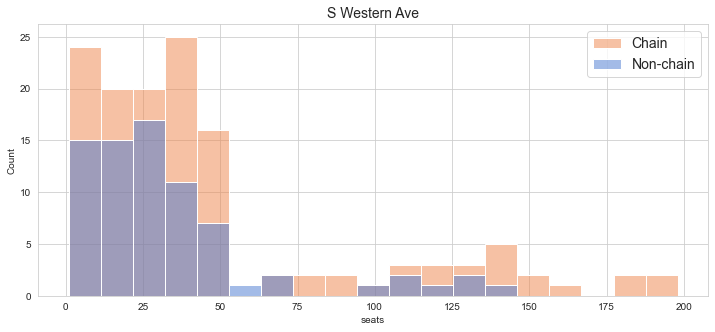

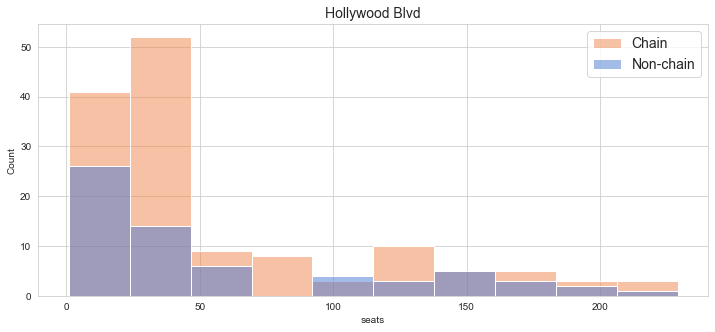

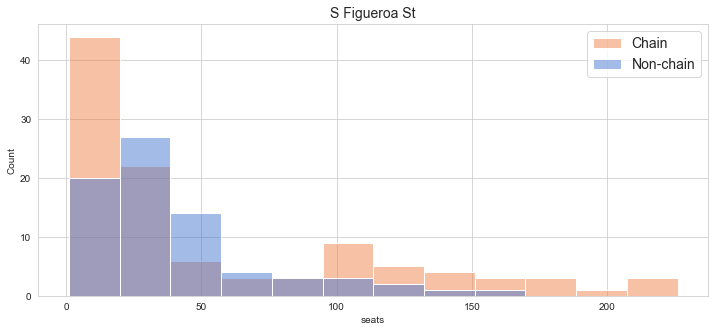

In [41]:
for street in toptenstreets.index:

    sns.set_style("whitegrid")
    plt.figure(figsize = (12,5))
    sns.histplot(
        data_raw.query('street == @street'),
        x = 'seats',
        hue = 'chain',
        hue_order = [ True, False],
        palette = 'muted').set_title(street, fontsize = 14)
    plt.legend(['Chain', 'Non-chain'], fontsize = 14)
    plt.show()

In [42]:
streets = data_raw.groupby('street').agg(
    {'object_name':'count', 'chain': 'sum', 'seats':'mean'}).sort_values('object_name', ascending = False)
streets['chain_ratio'] = streets['chain'] / streets['object_name']
streets.query('object_name > 100')

,object_name,chain,seats,chain_ratio
street,,,,
W Sunset Blvd,322,116,50.422360,0.360248
W Pico Blvd,314,100,40.197452,0.318471
E St,282,86,35.163121,0.304965
Wilshire Blvd,242,84,54.913223,0.347107
W St,216,73,41.365741,0.337963
W 6th St,214,72,40.602804,0.336449
Santa Monica Blvd,210,81,35.200000,0.385714
S Western Ave,208,75,42.024038,0.360577
Hollywood Blvd,203,64,57.418719,0.315271


In [43]:
streets.head(10).mean().round(2)

object_name    239.20
chain           82.60
seats           44.64
chain_ratio      0.35
dtype: float64

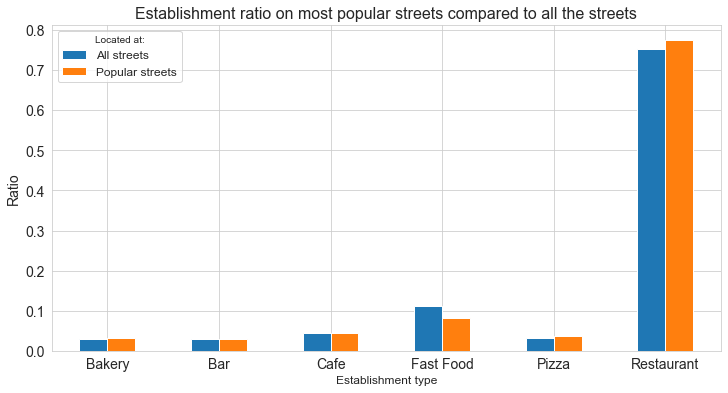

In [44]:
# check establishments type ratio on most popular streets:
data_top10 = data_raw.query('street in @toptenstreets.index')

compare_establishments_ratio = pd.concat([data_raw.object_type.value_counts(normalize = True),
                                         data_top10.object_type.value_counts(normalize = True)], axis = 1)

compare_establishments_ratio.plot(kind = 'bar', figsize = (12,6), rot = 0, fontsize = 14)
plt.legend(['All streets', 'Popular streets'], title = 'Located at:', fontsize = 12)
plt.title('Establishment ratio on most popular streets compared to all the streets', fontsize = 16)
plt.ylabel('Ratio', fontsize = 14)
plt.xlabel('Establishment type', fontsize = 12)
plt.show()

#### <font color = 'blue'>Notes:</font>

* W Sunset Blvd and W Pico Blvd have the largest amount of restaurants (322 and 314).
* There are 651 streets with only one restaurant.
* Streets with many establishments have 239 establishments on the average, with most of them being in the 'small' (up to 50 seats) category. Roughly 1/3 of establishments on those streets belong to chains, which is close to overall chain-nonchain ratio.

 [Return to table of contents ^^^](#Table-of-Contents)

# Step 3
## Market research on robot-run restaurants in LA: summary

In this project I analyzed open-source data on robot-run establishments in LA in order to assess current market condition. This research doesn't contain any info on profitability of such establishments, but provides more of overall picture about current trends and preferences.<br>
<br>

#### Categories I worked with:
Already at the first steps, while preprocessing the data and examining seats histogram, it became pretty obvious that most of the robot-run establishments are divided into three major size categories: 
* Small establishments (up to 50 seats)
* Medium establishments (up to 150 seats)
* Large establishments (151 seats and higher)<br>
<br>
Also the establishment types are sorted by following categories:<br>

* Bakery
* Bar
* Cafe
* Fast food
* Pizza
* Restaurant<br>
<br>
Later, while grouping by chain and examining number of establishments per chain, I also sorted the chains:<br>

* Small (up to 5 establishments)
* Medium (up to 15 establishments)
* Large (16 establishments and more)

#### Overall trends and tendencies:

* Most popular kind of establishment is restaurant (75.2%), with fast-food establishment following them (11%).
* 61.9% of establishments belong to chains. Most of the chains though (75% of them) have only 1 establishment in LA.
* Restaurants and bars are mostly non-chain (around 70%), while all the bakeries are exclusively belonging to chains.
* Most of the chains are small (up to 5 establishments) and running small restaurants (up to 50 seats).<br> In chains with more than 1 establishment, the average number of establishments per chain is only 4. 
* If we look at the average number of seats per establishment type, the restaurants are largest (with average of 50), and the bars are second largest (with average of 45 seats). Bakeries are the smallest and have around 20 seats on the average.
* Two most popular streets are W Sunset Blvd and W Pico Blvd, which have 322 and 314 establishments relatively.
* On most popular streets the trend remains the same: most of the establishments are small (up to 50 seats), and roughly 1/3 of them belong to chains.
* Popular streets can also be characterized by slightly more restaurants and pizzas, and by lower number of fast food establishments.

#### Conclusion:

The most popular robot-run establishments are restaurants, with the fast-food in the second place. It looks like popular streets have slightly less fast-food establishments and it may be a good choice to go with fast food.<br>
There are only 1/3 of chain establishments in LA, with most of them having . If we choose restaurant, it will be unlikely to develop a chain - only 1/4 of those are chains. But if we prefer go with fast food, the possibilites look much more positive, since more than half of those belong to chains.

## [Presentation](https://drive.google.com/file/d/1d63as8N667hHCVMBUKcSkqiLOD4kyV4F/view?usp=sharing)